## Assume you are appointed as a Data scientist in any international humanitarian NGO, after the recent funding programmes, have been able to raise around  120 million. Now thof the NGO callto choose how to use this money strategically and effectively. The significant issues that comes while making this conclusion are mostly related to choosing the countries that are in the direst need of aid. Your job is to classify the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. Apply Principal component analysis, K-Means Clustering & Hierarchical Clustering.

In [3]:
# Required Lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
c_data = pd.read_csv('country.csv')
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Checking for null values
c_data.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
c_data.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='gdpp'>

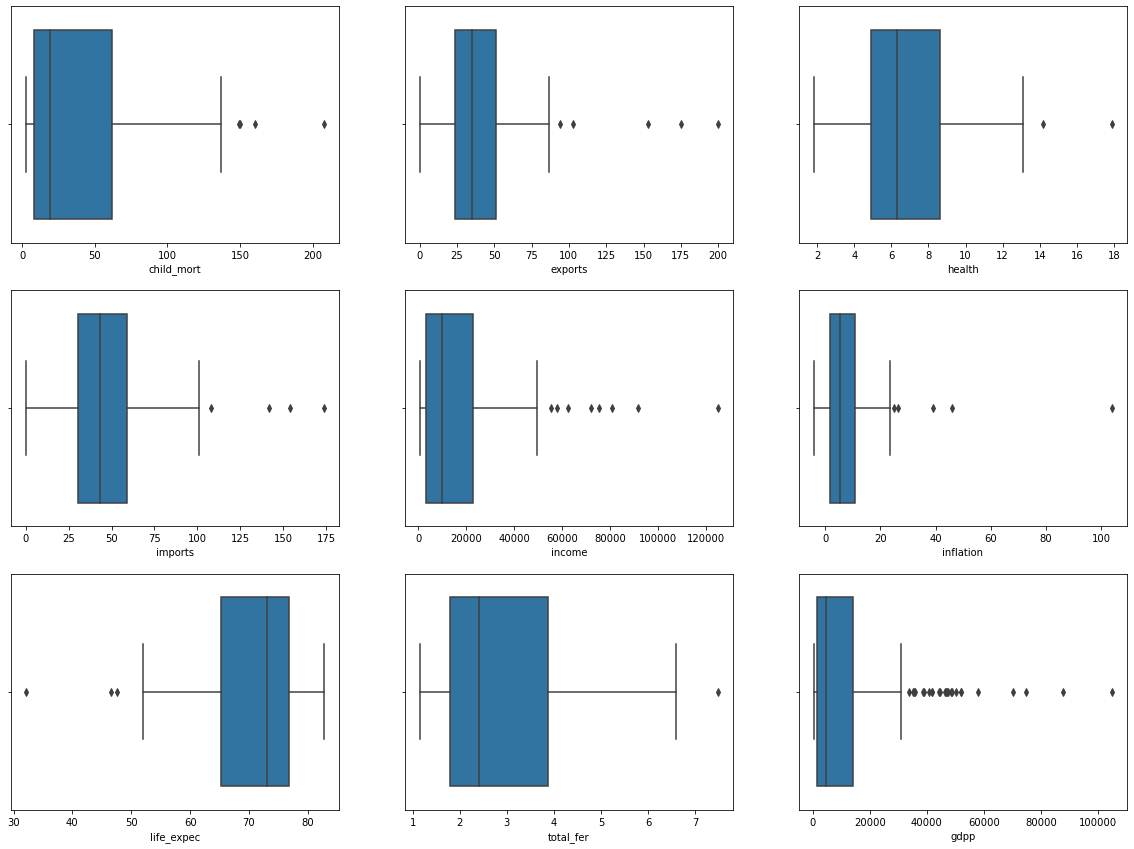

In [8]:
# Checking for outliers
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = c_data)
plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = c_data)
plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = c_data)
plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = c_data)
plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = c_data)
plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = c_data)
plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = c_data)
plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = c_data)
plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = c_data)

In [9]:
# Checking the outliers using Z-Score
from scipy import stats
z = np.abs(stats.zscore(c_data[['child_mort', 'exports', 'health', 
'imports', 'income',
 'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)
print('*********************************************************************')
print(np.where(z > 3))


     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      2.007808  0.775381  1.448071  0.165315  0.585043   1.387054   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

In [10]:
# Removing the outlier
c_data_outlier_removed = c_data[(z<3).all(axis=1)]
c_data_outlier_removed.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [11]:
print('Shape of dataframe before outlier removal: ' +str(c_data.shape))
print('Shape of dataframe after outlier removal: ' +str(c_data_outlier_removed.shape))
x = c_data_outlier_removed.drop('country',axis=1)
y = c_data_outlier_removed['country']

Shape of dataframe before outlier removal: (167, 10)
Shape of dataframe after outlier removal: (153, 10)


In [12]:
x.shape

(153, 9)

In [13]:
y.shape

(153,)

In [14]:
# Principle Component Analaysis
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 1.46183636, -1.41330427,  0.31809414, ..., -1.73823548,
         1.94438462, -0.72205486],
       [-0.56911214, -0.52600184, -0.08875965, ...,  0.71229884,
        -0.88698624, -0.46758977],
       [-0.27385196, -0.01333821, -1.02886841, ...,  0.73668227,
        -0.04504383, -0.44097058],
       ...,
       [-0.3842296 ,  1.64295967,  0.02579142, ...,  0.32216403,
        -0.6832905 , -0.66759343],
       [ 0.5263859 , -0.42741268, -0.62991469, ..., -0.36057191,
         1.16355093, -0.66759343],
       [ 1.26591606, -0.08235062, -0.34946208, ..., -2.25028743,
         1.65921057, -0.65680187]])

In [15]:
x_scaled_dataframe = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled_dataframe.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


<AxesSubplot:>

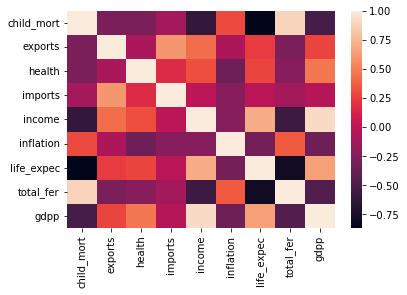

In [16]:
sns.heatmap(x_scaled_dataframe.corr())


In [17]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x_scaled)
PCA(random_state=42)
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [18]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [19]:
var_cumsm = np.cumsum(pca.explained_variance_ratio_)
var_cumsm


array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

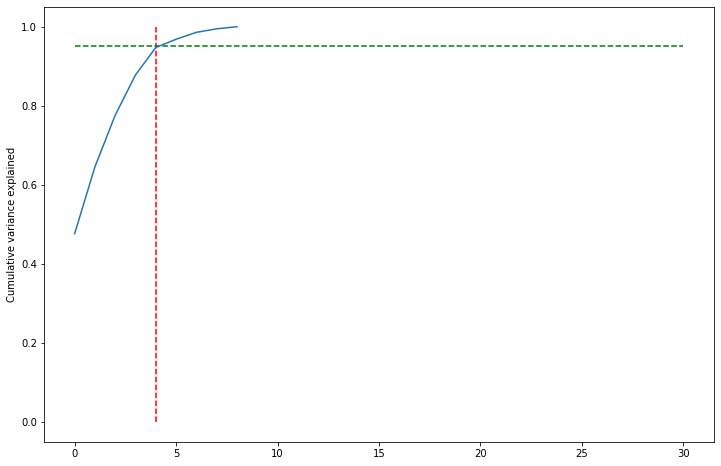

In [20]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumsm)
plt.ylabel("Cumulative variance explained")
plt.show()


In [21]:
# Performing PCA with 4 features
from sklearn.decomposition import IncrementalPCA
pca_end = IncrementalPCA(n_components=4)
pca_end = pca_end.fit_transform(x_scaled)
print(x.shape)
print(pca_end.shape)

(153, 9)
(153, 4)


In [22]:
corr = np.corrcoef(pca_end.T)
corr.shape


(4, 4)

<AxesSubplot:>

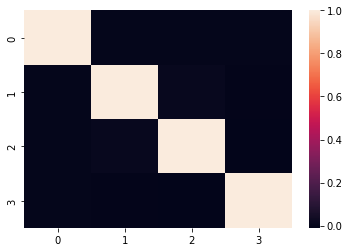

In [23]:

sns.heatmap(corr)

In [24]:
# Kmeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5,max_iter=1000)
kmeans.fit(pca_end)



KMeans(max_iter=1000, n_clusters=5)

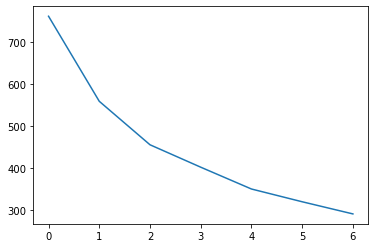

In [25]:
wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
 kmeans.fit(pca_end)
 
 wcss.append(kmeans.inertia_)
 
plt.plot(wcss)


In [26]:
# Shiloute Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
 
 # intialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
 kmeans.fit(pca_end)
 
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg = silhouette_score(pca_end, cluster_labels)
 print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3185783255391956
For n_clusters=3, the silhouette score is 0.3214159977534033
For n_clusters=4, the silhouette score is 0.3069208111507679
For n_clusters=5, the silhouette score is 0.29395007295356534
For n_clusters=6, the silhouette score is 0.30772683635772596
For n_clusters=7, the silhouette score is 0.2955666989197241
For n_clusters=8, the silhouette score is 0.2883747810973742


In [27]:
kmeans = KMeans(n_clusters=4,max_iter=1000,random_state=42)
kmeans.fit(pca_end)
KMeans(max_iter=1000, n_clusters=4, random_state=42)
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 3, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1])

In [28]:
c_data_outlier_removed['K-Means_Cluster_ID'] = kmeans.labels_

C:\Users\91830\AppData\Local\Temp\ipykernel_7892\2507830492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data_outlier_removed['K-Means_Cluster_ID'] = kmeans.labels_


In [29]:
# Hierarchical Clustering
x_scaled_dataframe.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


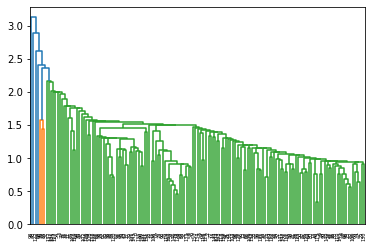

In [30]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
sl_mergings = linkage(x_scaled_dataframe, method="single", 
metric='euclidean')
dendrogram(sl_mergings)
plt.show()

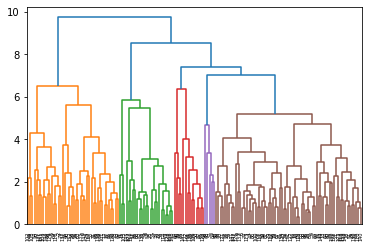

In [31]:
cl_mergings = linkage(x_scaled_dataframe, method="complete", 
metric='euclidean')
dendrogram(cl_mergings)
plt.show()


In [32]:
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
# single linkage doesnot perform well 
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels


array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

In [34]:
c_data_outlier_removed["Hierarchical_Cluster_labels"] =cl_cluster_labels

C:\Users\91830\AppData\Local\Temp\ipykernel_7892\1597811289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data_outlier_removed["Hierarchical_Cluster_labels"] =cl_cluster_labels


In [35]:
c_data_outlier_removed.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='income'>

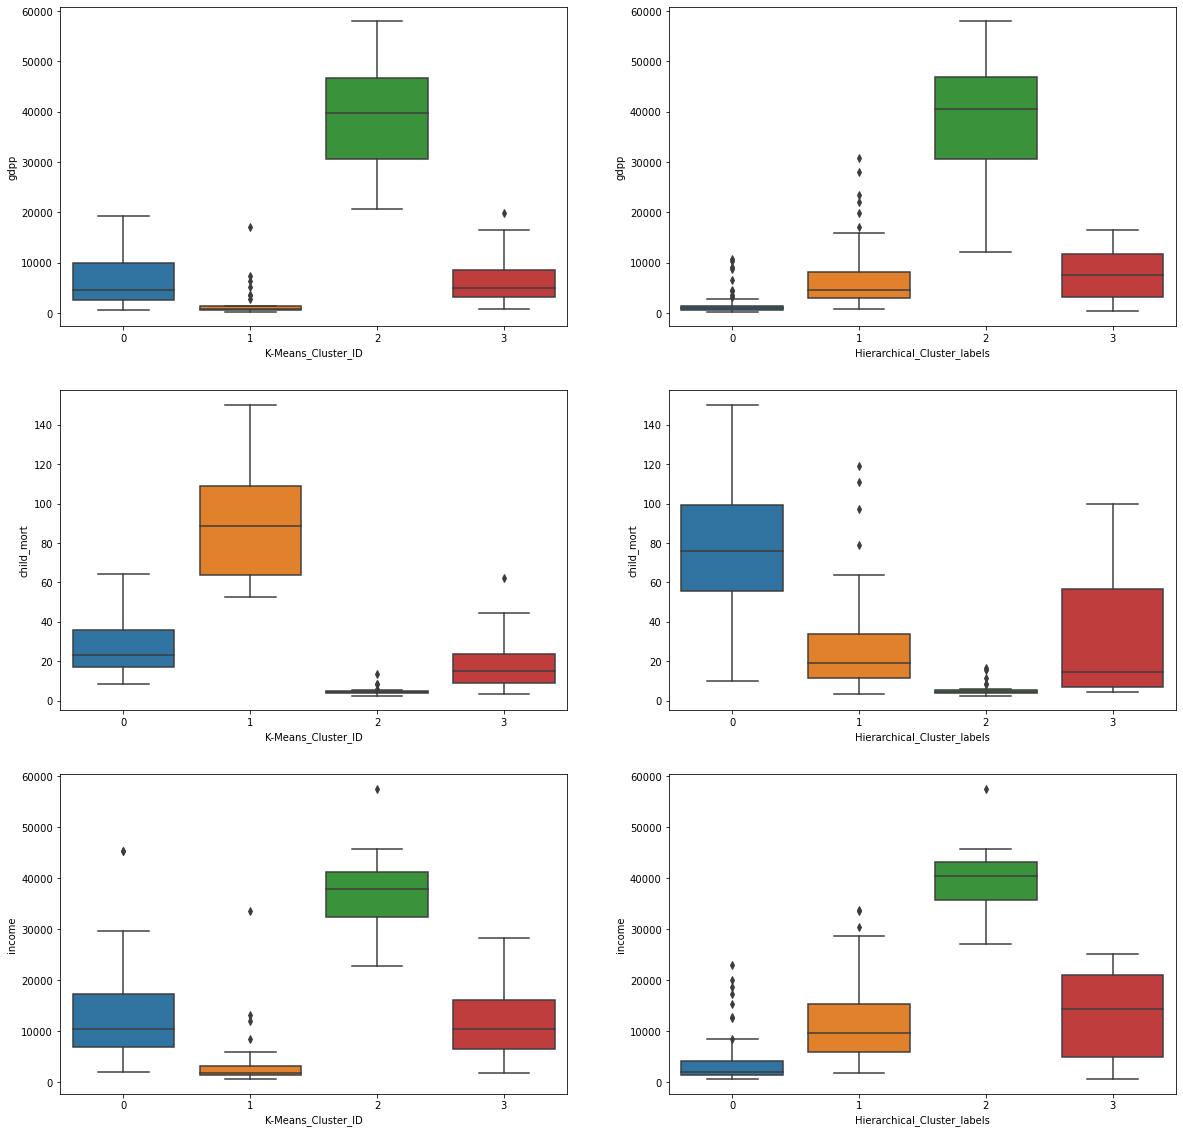

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', 
data=c_data_outlier_removed)
plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', 
data=c_data_outlier_removed)
plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', 
data=c_data_outlier_removed)
plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', 
data=c_data_outlier_removed)
plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='income', 
data=c_data_outlier_removed)
plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', 
data=c_data_outlier_removed)


In [37]:
X_pca_final_df =pd.DataFrame(pca_end,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df.head()


,PC1,PC2,PC3,PC4
0,-3.129112,-0.530438,1.326366,0.592673
1,0.552498,-0.242770,-0.157737,-1.362826
2,-0.357008,-0.461483,-1.876976,-0.109599
3,-3.456355,1.213750,-1.381585,2.217845
4,1.308078,0.615244,-0.031004,-0.713291


In [38]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels
X_pca_final_df.head()


,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-3.129112,-0.530438,1.326366,0.592673,1,0
1,0.552498,-0.242770,-0.157737,-1.362826,3,1
2,-0.357008,-0.461483,-1.876976,-0.109599,0,0
3,-3.456355,1.213750,-1.381585,2.217845,1,1
4,1.308078,0.615244,-0.031004,-0.713291,3,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

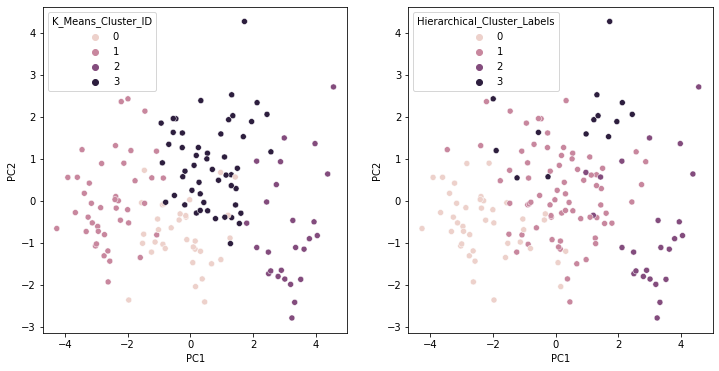

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')
plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

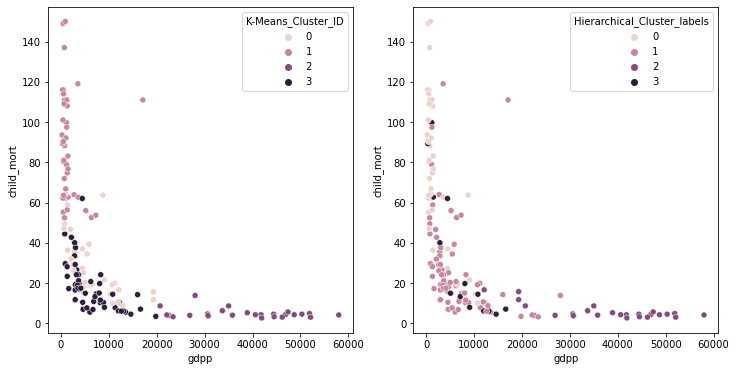

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='child_mort',data=c_data_outlier_removed,hue='K-Means_Cluster_ID')
plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='child_mort',data=c_data_outlier_removed,hue='Hierarchical_Cluster_labels')


<AxesSubplot:xlabel='gdpp', ylabel='income'>

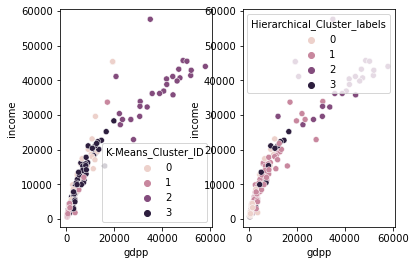

In [41]:
#Low gdpp corrsponds to low household income and hence higher child mortality rate
plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='income',data=c_data_outlier_removed,hue='K-Means_Cluster_ID')
plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='income',data=c_data_outlier_removed,hue='Hierarchical_Cluster_labels')


<AxesSubplot:xlabel='child_mort', ylabel='income'>

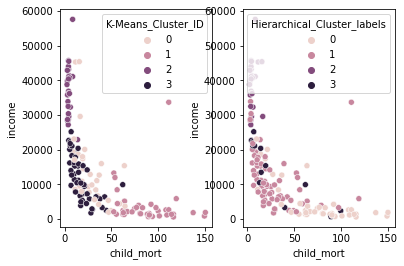

In [42]:
# We can observe a linear relationship between gdpp and income
plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='income',data=c_data_outlier_removed,hue='K-Means_Cluster_ID')
plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',data=c_data_outlier_removed,hue='Hierarchical_Cluster_labels')


In [43]:
K_Means_countries = c_data_outlier_removed[c_data_outlier_removed['K-Means_Cluster_ID'] == 1]
K_Means_countries


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,0


In [44]:
Hirarchical_countries =c_data_outlier_removed[c_data_outlier_removed['Hierarchical_Cluster_labels'] == 0]
Hirarchical_countries


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,0,0
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,0
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1,0


In [45]:
common_countries =pd.merge(K_Means_countries,Hirarchical_countries,how='inner',on=['country', 'child_mort', 'exports', 'health', 'imports', 'income',
 'inflation', 'life_expec', 'total_fer', 'gdpp', 'K-Means_Cluster_ID',
 'Hierarchical_Cluster_labels'])


In [46]:
common_countries.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'],
      dtype='object')

In [47]:
common_countries[['country', 'child_mort', 'income','gdpp']]

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
1,Benin,111.0,1820,758
2,Burkina Faso,116.0,1430,575
3,Burundi,93.6,764,231
4,Cameroon,108.0,2660,1310
5,Central African Republic,149.0,888,446
6,Chad,150.0,1930,897
7,Comoros,88.2,1410,769
8,"Congo, Dem. Rep.",116.0,609,334
9,Cote d'Ivoire,111.0,2690,1220


In [50]:
## dataframe with dereasing child mortality rate and increasing income
common_countries_final = common_countries[['country', 
'child_mort','income','gdpp']].sort_values(['child_mort','income'],ascending=[False,True])
common_countries_final

,country,child_mort,income,gdpp
6,Chad,150.0,1930,897
5,Central African Republic,149.0,888,446
18,Mali,137.0,1870,708
8,"Congo, Dem. Rep.",116.0,609,334
2,Burkina Faso,116.0,1430,575
14,Guinea-Bissau,114.0,1390,547
1,Benin,111.0,1820,758
9,Cote d'Ivoire,111.0,2690,1220
13,Guinea,109.0,1190,648
4,Cameroon,108.0,2660,1310


In [51]:
#Countries with direst need for aid can be selected from the above dataframe
final_countries =common_countries_final[(common_countries_final['child_mort'] > 80) & 
(common_countries_final['income'] < 1200)]
final_countries = final_countries.reset_index(drop=True)
final_countries


,country,child_mort,income,gdpp
0,Central African Republic,149.0,888,446
1,"Congo, Dem. Rep.",116.0,609,334
2,Guinea,109.0,1190,648
3,Mozambique,101.0,918,419
4,Burundi,93.6,764,231
5,Malawi,90.5,1030,459


In [ ]:
#Countries that are in direst need for aid 1.Central African Republic 2.Congo, Dem. Rep.
#3.Mozambique 4.Burundi 5.Malawi 6.Guinea